# 从生物神经元到人工神经元 From Biological to Artificial Neurons

## 感知机 The Perceptron

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

感知机是最简单的`ANN`模型，它基于`阈值逻辑单位TLU`或`线性阈值单位LTU`,

<img src="../images/other/10-1.png" width="300">

感知机最常用的是`Heaviside阶跃函数`,常用符号函数替代.感知机仅由单层`TLU`组成。当一层中所有神经元都连接上一层的每个神经元,这层被称为全连接层。通常会添加一个额外的偏置特征($x_0=1$)，被称为`偏置神经元`.

<img src="../images/other/10-2.png" width="400">

上图所示是具有两个输入神经元、一个偏置神经元和三个输出神经元的感知机架构.

----
**感知机算法：**

- 损失函数:
$$
L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$
- 梯度：
$$
\nabla_{w} L(w, b)=-\sum_{x_{i} \in M} y_{i} x_{i} ; \quad \nabla_{b} L(w, b)=-\sum_{x_{i} \in M} y_{i}
$$
- 参数更新:
    - 批量梯度下降法（Batch Gradient Descent）: 每次迭代时使用所有误分类点来进行参数更新。
$$
w \leftarrow w+\eta \sum_{x_{i} \in M} y_{i} x_{i} ; \quad b \leftarrow b+\eta \sum_{x_{i} \in M} y_{i}
$$
其中, $\eta(0<\eta \leq 1)$ 代表步长。
    - 随机梯度下降法（Stochastic Gradient Descent）: 每次随机选取一个误分类点。 
    $$w \leftarrow w+\eta y_{i} x_{i} ; \quad   b \leftarrow b+\eta y_{i}
$$

由于每个输出神经元的决策边界都是线性的,因此感知机无法学习复杂的模式。对于两类问题，如果训练集是线性可分的，那么感知器算法可以在有限次迭代后收敛.然而，如果训练集不是线性可分的，那么这个算法则不能确保会收敛.

使用单个`TLU`根据花瓣长度和宽度对鸢尾花进行分类

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data'][:,(2, 3)]              # 花瓣长度和宽度
y = (iris['target']==0).astype(np.int32)  # 仅分类是不是山鸢尾花

- 利用`Scikit-Learn`的`Perceptron()`类实现感知机

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
per_model = Perceptron(random_state=42)
per_model.fit(X, y)

Perceptron(random_state=42)

In [5]:
y_pred = per_model.predict([[2, 0.5]])
y_pred

array([1], dtype=int32)

等价于使用以下超参数的随机梯度下降分类器.

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=1, penalty=None)
sgd_model.fit(X, y)
sgd_model.predict([[2, 0.5]])

array([1], dtype=int32)

## 多层感知机和反向传播 The Multilayer Perceptron and Backpropagation

可以通过堆叠多个敢直接来消除感知机的某些局限性,如异或问题。所得的`ANN`被成为`多层感知机MLP`

<img src="../images/other/10-3.png" width="400">

上图所示是具有两个输入、一个含有四个神经元的隐藏层和三个输出神经元的多层感知机架构.

当一个`ANN`包含一个深层的隐藏层时，它被称为`深度神经网络DNN`.训练`MLP`的常见算法是反向传播算法,其能够针对每个模型参数计算网络误差的梯度，反向传播使用的自动微分模式是反向模式。

对于每个训练实例,反向传播算法首先进行预测(正向传播)并测量误差，然后反向经过每个层来测量来自于每个连接的误差贡献(反向传递),最后调整连接权重以减少错误(梯度下降)。

接下来介绍几重常见的激活函数:

> 1. Sigmoid 函数
$$
 σ(x) = \frac{1}{1+e^{-x}}
$$
2. Tanh 函数
$$
 tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}-e^{-x}}=2σ(2x)-1
$$

<img src="../images/other/10-4.png" width="300">

>3. ReLU 函数
$$
 ReLu(x) = max(x, 0)
$$

<img src="../images/other/10-5.png" width="300">

具有非线性激活函数的足够大的DNN,理论上可以近似任何连续函数。

## 回归MLP Regression MLPs

|  超参数   | 典型值  |
|  :----  | :----  |
| 输入神经元数量  | 每个输入特征一个(例如, MNIST为28×28=784) |
| 隐藏层数量  | 取决于问题,但通常为1到5 |
| 每个隐藏层的神经元数量  | 取决于问题,但通常为10到100  |
| 输出神经元数量  | 每个预测维度输出1个神经元 |
| 隐藏的激活 | RcLU(或SELU) |
| 输出激活 | 无,或ReLU/ softplus(如果为正输出)或逻辑/tanh(如果为有界输出 |
| 损失函数 | MSE或MAE/ Huber(如果存在离群值) |

## 分类MLP Classification MLPs

|  超参数   | 二进制分类  |  多标签二进制分类   | 多类分类  |
|  :----  | :----  |  :----  | :----  |
| 输入层和隐藏层  | 与回归相同 |与回归相同 |与回归相同 |
| 输出神经元数量  | 1 |每个标签1 | 每个类1|
| 输出层激活 | 逻辑 | 逻辑 | Softmax |
| 损失函数 | 交叉熵 |交叉熵 |交叉熵 |

# 使用Keras实现MLP Implementing MLPs with Keras

<img src="../images/other/10-6.png" width="400">

Keras API的两种实现方式:`多后端的Keras`和`tf.keras`.

## 安装 TensorFlow 2 

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
tf.__version__

'2.9.2'

In [9]:
keras.__version__

'2.9.0'

## 使用顺序API构建图像分类器

### 使用Keras加载数据集 Using Keras to load the dataset

`Fashion MNIST`具有70 000张灰度图像,每张28*28像素,有是个类.与`MNIST`格式相同.

- 加载数据集

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [12]:
# 使用sklearn加载MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X_sk = mnist['data'].astype(np.float32)
y_sk = mnist['target'].astype(np.uint8)

In [13]:
X_sk.shape

((70000, 784),)

可见，使用Keras加载`MNIST`或`Fashion MNIST`,每张图片不是784的一维矩阵,且像素表示为整数.且数据集已经分好了训练集和测试集.

- 在训练集上创建验证集。进行特征缩放,将像素降到0~1范围内.

In [14]:
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

X_test  = X_test / 255.0

- 查看单张图片

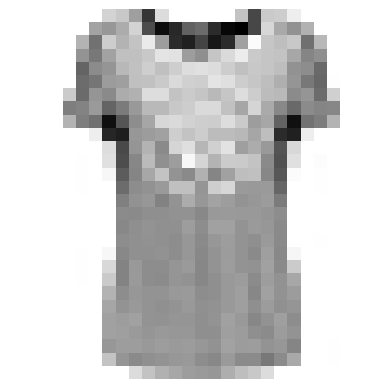

In [15]:
plt.imshow(X_train[1], cmap='binary')
plt.axis('off')
plt.show()

- 查看标签

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
# 设置类名
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[1]]    # class_names[0]    

'T-shirt/top'

<img src="../images/other/10-7.png" width="500">

### 使用顺序API创建模型 Creating the model using the Sequential API

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

- 建立具有两个隐藏层的分类MLP:

In [20]:
# 创建一个顺序API
model = keras.models.Sequential()
# 构建Flatten层 将图像展平 第一层需要指定输入数据的形状
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 添加300个神经元的Dense全连接层 使用ReLU作为激活函数
model.add(keras.layers.Dense(300, activation='relu'))

model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(1, activation='softmax'))

2022-10-25 20:42:40.010618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 20:42:40.033404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 20:42:40.033671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 20:42:40.034197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1. 每个Dense全连接层管理自己的权重矩阵,其中包括神经元及其输入之间所有的连接权重,以及管理偏置项的一个向量.如第一个隐藏层连接权重为784*300+300个偏置=235 500个参数
2. `activation='relu'` 等价于 `activation=keras.activations.relu`

In [21]:
keras.backend.clear_session()  # 清理session 

- 也可以在创建顺序模型时传递层列表:

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

- 使用来自keras.io的代码示例

In [23]:
# keras.io的代码
# from keras.layers import Dense
# output_layer = Dense(1)

# 应该使用如下代码
# from tensorflow.keras.layers import Dense
# output_layer = Dense(10)

# 或者使用完整路径
# from tensorflow import keras
# output_layer = keras.layers.Dense(10)

- 显示模型的所有层

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 获取模型的层列表

In [25]:
model.layers

In [26]:
# 按索引获取层
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer(hidden1.name) is hidden1

True

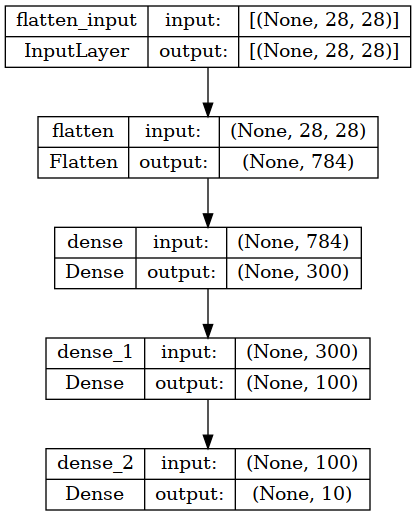

In [28]:
# 绘制模型的层示例图
keras.utils.plot_model(model, 'model.png', show_shapes=True)

- 查看层的参数

In [29]:
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

((784, 300), (300,))

### 编译模型 Compiling the model

在创建模型之后,你必须调用`complie()`来指定损失函数和要使用的优化器,以及训练和评估时需要的额外指标。

In [30]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer="sgd",
              metrics=['accuracy']
             )

In [31]:
# 等价于
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy]   # 仅在使用此损失时
             )

- **loss**:
    - `categorical_crossentropy`，那y必须是`one-hot`处理过的
    - `sparse_categorical_crossentropy`，那y是稀疏标签,即原始的整数形式
    - 都是将数字编码转化成`one-hot`编码格式，然后对one-hot编码格式的数据（真实标签值）与预测出的标签值使用交叉熵损失函数
- **optimizer**:
    - `sgd`:使用随机梯度下降来训练模型 默认`lr=0.01`, 通过`keras.optimizers.SGD(lr=0.01)`设置
- **metrics**:
    - 如果真实值标签和预测值都是具体的`index值`（如真值序列 = [1, 1, 1], y_pred=[0, 1, 1]）时，直接使用`accuracy`评价函数就可以满足大部分情况。（即非常简单的应用场景，数据集当中有明确的分类信息label）
    - 如果真实值标签是具体的`index值`，而预测值是`向量`形式，且问题为`多分类问题`（如真实值= [1, 1, 1], 预测序列=[[0.2, 0.3, 0.5], [0.45, 0.2, 0.35], [0, 0.24, 0.78]]）时，用`sparse_categorical_accuracy`评价函数可以解决问题。
    - 如果真实值标签是`one-hot`形式，而预测值是`向量`形式（如真实值 = [[0, 1, 0], [0, 0, 1], [1, 0, 0]], 预测值= [[0.52, 0.33, 0.15], [0.9, 0.1, 0], [0, 0.4, 0.6]]）时，用`categorical_accuracy`评价函数就可以。


### 训练和评估模型 Training and evaluating the model

- 训练模型

In [32]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                   )

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7013 - sparse_categorical_accuracy: 0.7691 - val_loss: 0.5173 - val_sparse_categorical_accuracy: 0.8202
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4859 - sparse_categorical_accuracy: 0.8295 - val_loss: 0.4353 - val_sparse_categorical_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4427 - sparse_categorical_accuracy: 0.8439 - val_loss: 0.5413 - val_sparse_categorical_accuracy: 0.7972
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4163 - sparse_categorical_accuracy: 0.8553 - val_loss: 0.3952 - val_sparse_categorical_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3980 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.3792 - val_sparse_categorical_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3793 - spars

- 如果训练集非常不平衡,可以在`fit()`设置`class_weight`参数,给代表性不足的类更大的权重.
- 如果需要每个实例的权重,可以设置`sample_weight`参数.如给专家标记的实例更大的权重.
- 如果都设置了,Keras将会把它们相乘.

In [33]:
# 查看训练参数
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

`history.history`将记录训练集和验证集在每个轮次结束后测得的损失和指标的字典，可用来绘制学期曲线

- 绘制学习曲线

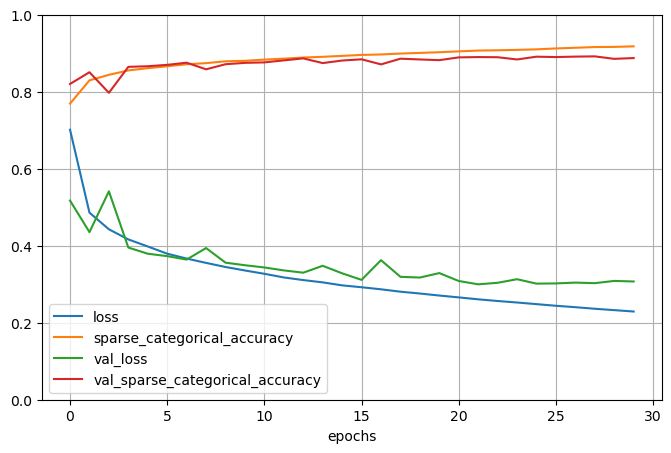

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)    # 图例的位置
plt.xlabel('epochs')
plt.show()

由此可见，损失和准确率都在稳步的下降和提高，同时验证曲线和训练曲线都很接近，没有发生过多的过拟合。

注意:验证误差是在每个轮次后计算的,而训练误差是使用整个轮次的运行平均值计算，因此训练曲线时,**应将其向左移动半个轮次**.

如果对模型性能不满意，首先应该检查学习率，而后尝试使用另外一个优化器(并重新调整学习率)。如果性能仍然不佳，考虑调整模型的超参数(如层数，每层神经元个数以及激活函数类型等)。还可以调整其他超参数，如`batch_size`.

- 在测试集上评估泛化误差

对模型的验证精度感到满意后，应在测试集上评估泛化误差，然后将模型部署到生产环境中.

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 857us/step - loss: 0.3388 - sparse_categorical_accuracy: 0.8800


[0.33878564834594727, 0.8799999952316284]

### 使用模型进行预测  Using the model to make predictions

- 使用测试集的前三个实例作为新实例进行预测

In [36]:
X_new = X_test[:3]
X_pred_proba = model.predict(X_new)
X_pred_proba.round(2)   # 保留2位小数

1/1 [==============================] - 0s 47ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

对于每个实例，模型估计从0~9每个类的概率.

- 输出估计概率最高的类

In [37]:
y_pred = np.argmax(X_pred_proba, axis=1)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

由此可见,新实例被正确的分类.

## 使用顺序API构建回归

本例中使用简化版的加州住房问题的数据集.该数据集中仅包含数字特征并且没有缺失值.

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [41]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

In [42]:
# 将数据集分为训练集,验证集,测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(X ,y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [43]:
# 特征缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [44]:
# 使用顺序API构建回归MLP
keras.backend.clear_session()
input_shape = X_train.shape[1:]   # (8:,)

model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=input_shape),
    keras.layers.Dense(1)   # 仅预测一个单值 因此输出层只有一个神经元
])

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD()
             )

history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val)
                   )

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8100 - val_loss: 0.6975
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5505 - val_loss: 0.5031
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4892 - val_loss: 0.4854
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4561 - val_loss: 0.4827
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.4683
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4437 - val_loss: 0.4626
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4205 - val_loss: 0.4370
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4107 - val_loss: 0.4370
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4040 - val_loss: 0.4280
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4002 - val_loss: 0.4254

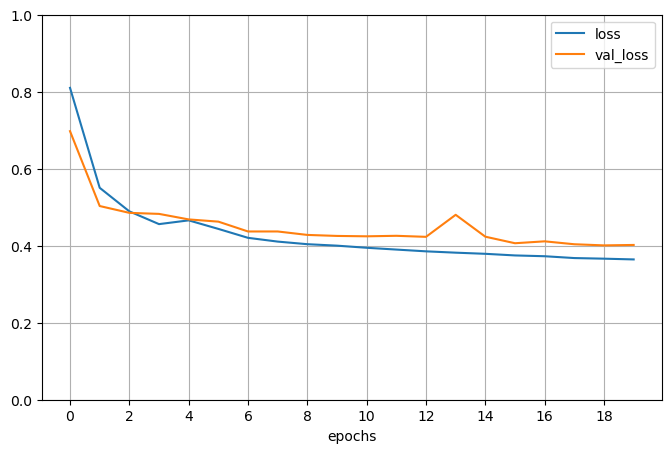

In [45]:
# 绘制学习曲线
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)    # 图例的位置

plt.xticks(np.arange(0, history.params['epochs'], 2))
plt.xlabel('epochs')
plt.show()

In [46]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 666us/step - loss: 0.3791


In [47]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[0.5257441],
       [1.6829326],
       [3.5758224]], dtype=float32)

In [48]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

## 使用函数式API构建复杂模型

### 宽深神经网络 Wide & Deep neural network

`Wide & Deep Learning神经网络`架构是将所有或部分输入直接连接到输出层，这种架构使神经网络能够学习深层模式(深度路径)和简单规则(短路径).相比之下,传统的`MLP`将所有的数据流经整个层堆叠.

<img src="../images/other/10-8.png" width="200">

In [49]:
input_shape = X_train.shape[1:]  # (8:,)

# 创建Input对象 指定输入类型的规范
input_layer = keras.layers.Input(shape=input_shape)
# 构建Layer之间的函数链式关系
hidden1 = keras.layers.Dense(30, activation="relu")(input_layer)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 合并输入和第二个隐藏层的输出
concat = keras.layers.concatenate([input_layer, hidden2])
output_layer = keras.layers.Dense(1)(concat)

# inputs与outputs一定是Layer调用输出的张量
model = keras.Model(inputs=[input_layer], outputs=[output_layer])

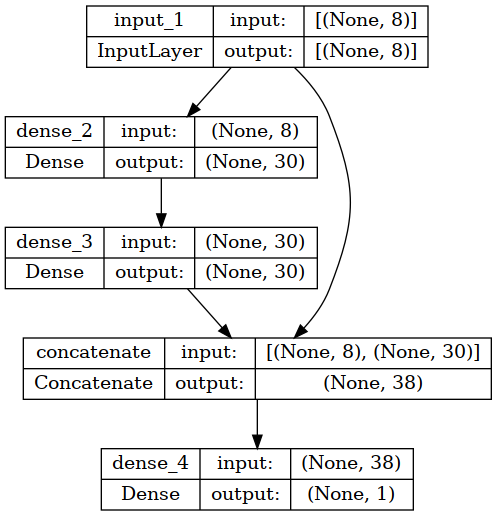

In [50]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [51]:
# 编译 训练
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3)
             )
history = model.fit(X_train, y_train,
                    epochs=20, validation_data=(X_val, y_val)
                   )

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9272 - val_loss: 0.8958
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8483 - val_loss: 0.7801
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7538 - val_loss: 0.7121
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6913 - val_loss: 0.6646
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6472 - val_loss: 0.6265
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6104 - val_loss: 0.6001
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 0.5772
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5614 - val_loss: 0.5606
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5443 - val_loss: 0.5472
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5307 - val_loss: 0.5364

In [52]:
# 评估 预测
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 35ms/step


array([[0.7769598],
       [1.5724039],
       [3.0590765]], dtype=float32)

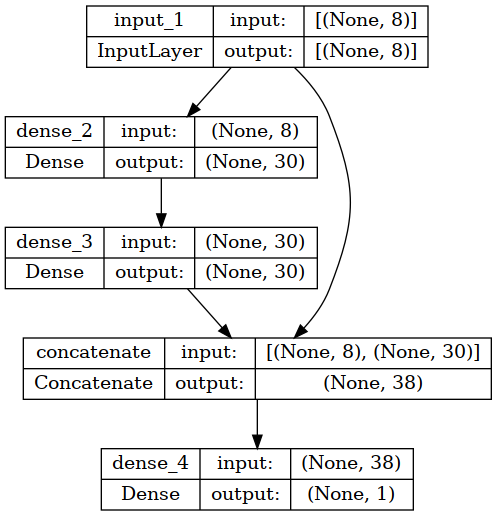

In [53]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### 处理多输入 Handling multiple inputs

<img src="../images/other/10-9.png" width="200">

假设通过宽路径输入5个特征(0-4),并从深路径输入6个特征(2-7).

In [54]:
# 构建模型
input_layer_A = keras.layers.Input(shape=[5], name="wide_input")
input_layer_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_layer_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_layer_A, hidden2])

output_layer = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_layer_A, input_layer_B],
                    outputs=[output_layer])

In [55]:
# 编译
model.compile(
    loss='mse',  # keras.losses.mean_squared_error
    optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [56]:
# 训练
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history = model.fit((X_train_A, X_train_B),
                    y_train,
                    epochs=20,
                    validation_data=((X_val_A, X_val_B), y_val))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2388 - val_loss: 0.9660
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8768 - val_loss: 0.7653
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7297 - val_loss: 0.6947
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6700 - val_loss: 0.6531
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6305 - val_loss: 0.6225
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6025 - val_loss: 0.6011
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5812 - val_loss: 0.5837
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5645 - val_loss: 0.5701
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5511 - val_loss: 0.5587
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5407 - val_loss: 0.5493

In [57]:
# 评估
mse_test = model.evaluate(x=(X_test_A, X_test_B), y=y_test)

162/162 [==============================] - 0s 732us/step - loss: 0.5073


In [58]:
# 预测
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model.predict(x=(X_new_A, X_new_B))
y_pred

1/1 [==============================] - 0s 34ms/step


array([[0.8187243],
       [1.7528498],
       [2.841065 ]], dtype=float32)

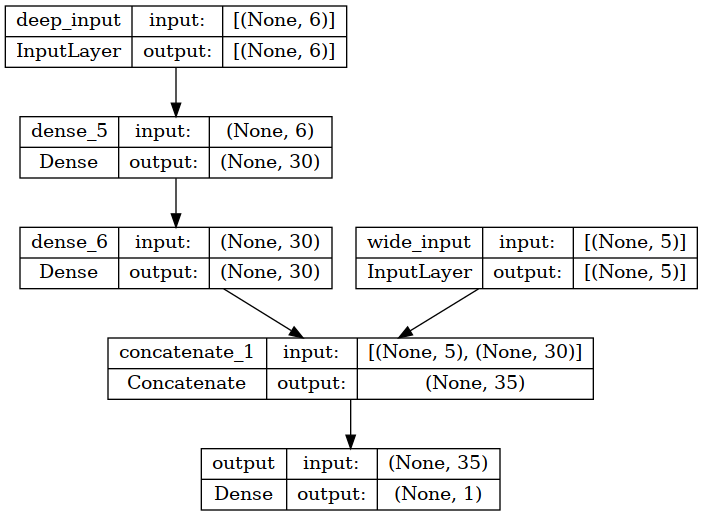

In [59]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### 处理多输出 Handling multiple outputs

<img src="../images/other/10-10.png" width="200">

在神经网络结构中添加一些辅助输出,以确保网络的主要部分自己能学习有用的东西,而不依赖与网络的其余部分.

In [60]:
# 构建模型
input_layer_A = keras.layers.Input(shape=[5], name="wide_input")
input_layer_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_layer_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_layer_A, hidden2])

output_layer = keras.layers.Dense(1, name="output")(concat)
aux_output_layer = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_layer_A, input_layer_B],
                    outputs=[output_layer, aux_output_layer])

每个输出都需要有自己的损失函数,默认情况下,`keras`将计算所有这些损失,并将他们简单的累加即可得到用于训练的最终损失.

本例中,由于我们更加关注主要输出,因此要在编译时设置其更大的权重.

In [61]:
# 编译
model.compile(loss=['mse', 'mse'],
              loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(learning_rate=1e-3)
             )

In [62]:
# 训练    需要为每个输出提供标签
history = model.fit([X_train_A, X_train_B], [y_train, y_train],
                    epochs=20, 
                    validation_data=([X_val_A, X_val_B], [y_val, y_val])
                   )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7221 - output_loss: 2.4292 - aux_output_loss: 5.3584 - val_loss: 1.4128 - val_output_loss: 1.0610 - val_aux_output_loss: 4.5792
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1177 - output_loss: 0.8333 - aux_output_loss: 3.6777 - val_loss: 0.9523 - val_output_loss: 0.7219 - val_aux_output_loss: 3.0265
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8645 - output_loss: 0.6824 - aux_output_loss: 2.5038 - val_loss: 0.8241 - val_output_loss: 0.6638 - val_aux_output_loss: 2.2669
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7732 - output_loss: 0.6446 - aux_output_loss: 1.9298 - val_loss: 0.7652 - val_output_loss: 0.6405 - val_aux_output_loss: 1.8874
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7256 - output_loss: 0.6236 - aux_output_loss: 1.6442 - val_loss: 0.7294 - val_output_loss: 0.6228 - val_aux_

In [63]:
# 评估
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 983us/step - loss: 0.5652 - output_loss: 0.5139 - aux_output_loss: 1.0267


In [64]:
# 预测
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

1/1 [==============================] - 0s 39ms/step


(array([[0.70507675],
        [1.6744595 ],
        [2.7402031 ]], dtype=float32),
 array([[1.3073046],
        [1.7646711],
        [2.2758622]], dtype=float32))

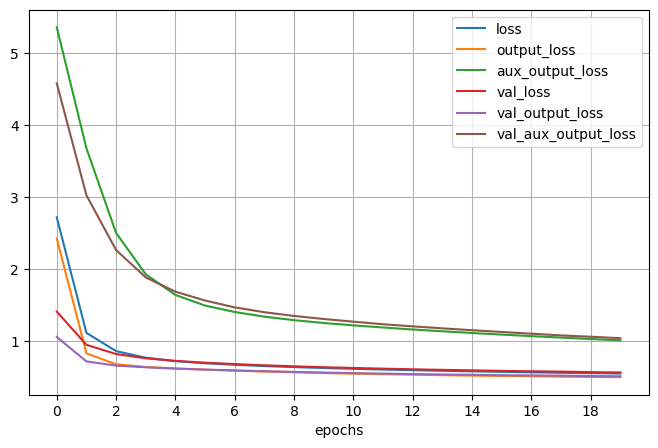

In [65]:
# 绘制学习曲线
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)    # 图例的位置

plt.xticks(np.arange(0, history.params['epochs'], 2))
plt.xlabel('epochs')
plt.show()

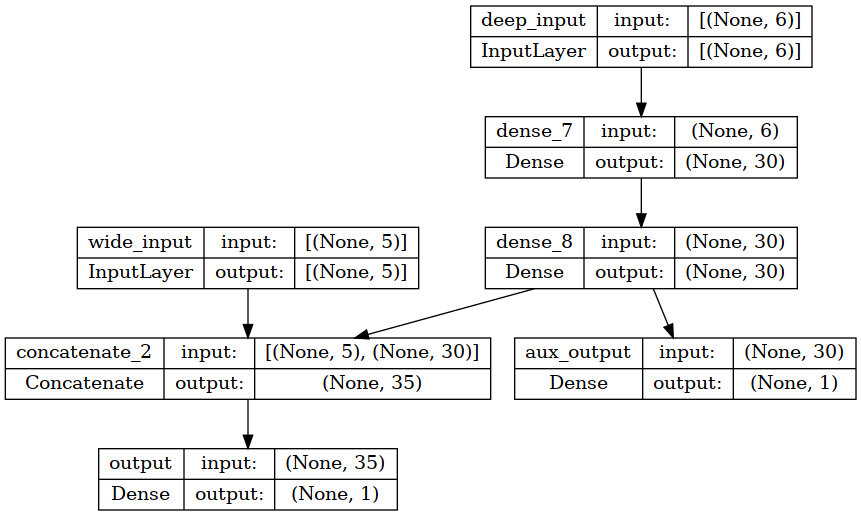

In [66]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 使用子类API构建动态模型

`顺序API`和`函数式API`都是声明性的:首先声明要使用的层以及应该如何连接它们,然后才能开始向模型提供一些数据进行训练或推断。

这具有许多优点:
1. 可以轻松地保存、克隆 和共享模型;
2. 可以显示和分析它的结构;
3. 框架可以推断形状和检査类型,因此可以及早发现错误(即在任何数据通过模型之前)。
4. 由于整个模型是一个静态图,因此调试起来也相当容易。

但另一方面是它是静态的。一些模型渉及循环、变化的形状、条件分支和其他动态行为。对于这种情况,或者只是你喜欢命令式的编程风格,则子类更加适合.

对`Model类`进行子类化,在构造函数中创建所需的层,然后在`cal1()`中方法所需的计算即可。

In [67]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [68]:
# 编译
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3)
             )
# 训练    需要为每个输出提供标签
history = model.fit((X_train_A, X_train_B), (y_train, y_train),
                    epochs=10, 
                    validation_data=((X_val_A, X_val_B), (y_val, y_val))
                   )
# 评估
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
# 预测
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model.predict(x=(X_new_A, X_new_B))
y_pred

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.8707 - output_1_loss: 1.8762 - output_2_loss: 1.9945 - val_loss: 1.9497 - val_output_1_loss: 0.8553 - val_output_2_loss: 1.0945
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.7679 - output_1_loss: 0.7633 - output_2_loss: 1.0046 - val_loss: 1.6037 - val_output_1_loss: 0.6925 - val_output_2_loss: 0.9113
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 1.5201 - output_1_loss: 0.6595 - output_2_loss: 0.8606 - val_loss: 1.4364 - val_output_1_loss: 0.6243 - val_output_2_loss: 0.8121
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 1.3772 - output_1_loss: 0.6003 - output_2_loss: 0.7769 - val_loss: 1.3384 - val_output_1_loss: 0.5821 - val_output_2_loss: 0.7563
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 1.2879 - output_1_loss: 0.5600 - output_2_loss: 0.7279 - val_loss: 1.2687 - val_output_1_loss: 0.5509 - val_ou

(array([[0.45769644],
        [1.6860459 ],
        [2.7468543 ]], dtype=float32),
 array([[0.8706578],
        [2.0541875],
        [2.3792446]], dtype=float32))

## 保存和还原模型 Saving and Restoring a Model

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [70]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.1238 - val_loss: 0.9876
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8416 - val_loss: 0.7324
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7188 - val_loss: 0.6948
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6810 - val_loss: 0.6686
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6531 - val_loss: 0.6448
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6293 - val_loss: 0.6255
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6087 - val_loss: 0.6090
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5900 - val_loss: 0.5934
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5735 - val_loss: 0.5785
Epoch 10/10
162/162 [==============================] - 0s 730us/step - loss: 0.5567


- 保存训练好的模型

In [71]:
model.save("../models/my_keras_model.h5")

`Keras`使用`HDF5`格式保存模型的结构，包括每一层的超参数和每一层的模型参数数值以及优化器信息等.

- 加载模型

In [72]:
model = keras.models.load_model("../models/my_keras_model.h5")

In [73]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 30ms/step


array([[0.9649321],
       [1.4028723],
       [2.539595 ]], dtype=float32)

- 使用子类API保存和还原模型

In [74]:
model.save_weights("my_keras_weights.ckpt")

In [75]:
model.load_weights("my_keras_weights.ckpt")

## 使用回调函数 Using Callbacks

在大型数据集上进行训练时，我们不仅要保存训练结束时的模型，还应该在训练过程中定期保存检查点.`fit()`方法接受一个`callbacks`参数，该参数使你可以指定在训练开始或结束时，每个轮次开始或结束时将调用的对象列表

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

### ModelCheckpoint

`ModelCheckpoint`回调会定期保存模型的检查点，默认是每个轮次结束后。如果使用验证集，可以设置`save_best_only=True`,只在验证集上的模型性能达到最好时，才保存模型.

In [77]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("../models/my_keras_model.h5", save_best_only=True)

In [78]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb]
                   )

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.6233 - val_loss: 0.8844
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7769 - val_loss: 0.7296
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6980 - val_loss: 0.6745
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6531 - val_loss: 0.6389
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6196 - val_loss: 0.6110
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5915 - val_loss: 0.5882
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5681 - val_loss: 0.5685
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5482 - val_loss: 0.5517
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5317 - val_loss: 0.5384
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5182 - val_loss: 0.5269

In [79]:
model = keras.models.load_model("../models/my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 673us/step - loss: 0.5193


### EarlyStopping

使用`EarlyStopping`回调，如果在多个轮次的验证集上没有任何进展，它将中断训练，并且可以选择回滚到最佳模型.

In [80]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,  # 至多10个轮次
    restore_best_weights=True)

可以与`ModelCheckpoint`回调相结合防止计算机,崩溃浪费时间和资源。

In [81]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5062 - val_loss: 0.5175
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4961 - val_loss: 0.5074
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.5002
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4802 - val_loss: 0.4941
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4741 - val_loss: 0.4885
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4684 - val_loss: 0.4846
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4637 - val_loss: 0.4795
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4593 - val_loss: 0.4756
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4555 - val_loss: 0.4726
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4525 - val_lo

In [82]:
model = keras.models.load_model("../models/my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 705us/step - loss: 0.3678


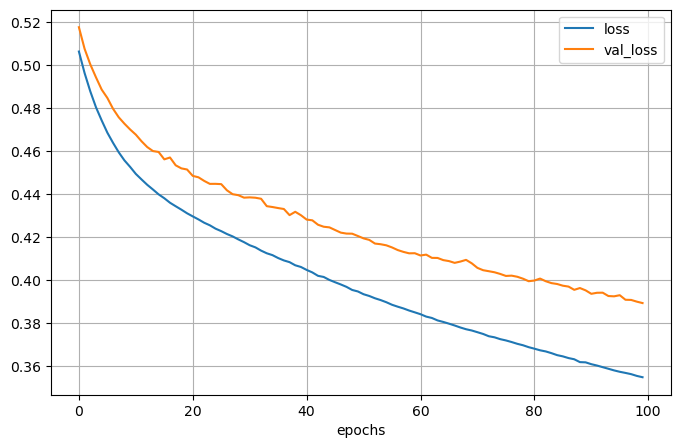

In [83]:
# 绘制学习曲线
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)    # 图例的位置

#plt.xticks(np.arange(0, history.params['epochs'], 2))
plt.xlabel('epochs')
plt.show()

In [84]:
keras.backend.clear_session()

## 使用TensorBoard进行可视化

使用`TensorBoard`,需要修改程序以便将要可视化的数据输出到名为事件文件的特殊二进制日志文件中。毎个二进制数据记录称为`摘要`。 `TensorBoard`服务器将监视日志目录,并将自动获取更改并更新可视化效果:这使你可以可视化实时数据(有短暂延退),例如训练期间的学习曲线。

通常你需要把`TensorBoard`服务器指向根日志目录并配置程序,以使其在每次运行时都写入不同的子目录。这样相同的`TensorBoard`服务器实例可以使你可视化并比较程序多次运行中的数据,而不会混淆所有内容。

首先定义用于`TensorBoard`日志的根日志目录,再加上一个将根据当前日期和时间生成一个子目录的函数,以便每次运行时都不同。

In [85]:
import os
import time

In [86]:
root_logdir = os.path.join('../Logs/', "my_logs_P10")
root_logdir

'../Logs/my_logs_P10'

In [87]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_dir = get_run_logdir()
run_dir

'../Logs/my_logs_P10/run_2022_10_25-20_45_06'

以学习率为0.01为例

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [89]:
# 使用TensorBoard()回调
tensorboard_cb = keras.callbacks.TensorBoard(run_dir)

In [90]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.9686 - val_loss: 0.8856
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7974 - val_loss: 0.6997
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6773 - val_loss: 0.6554
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6322 - val_loss: 0.6231
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6002 - val_loss: 0.5961
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5741 - val_loss: 0.5745
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5528 - val_loss: 0.5561
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5348 - val_loss: 0.5408
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5201 - val_loss: 0.5285
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5082 - val_loss: 0.5180

- 启动`TensorBoard`服务器

1. 终端启动
```bash
$ tensorboard --logdir=./my_logs --port=6006
```

2. 直接在Jupyter启动

In [91]:
%load_ext tensorboard
%tensorboard --logdir=../Logs/my_logs_P10 --port=6060

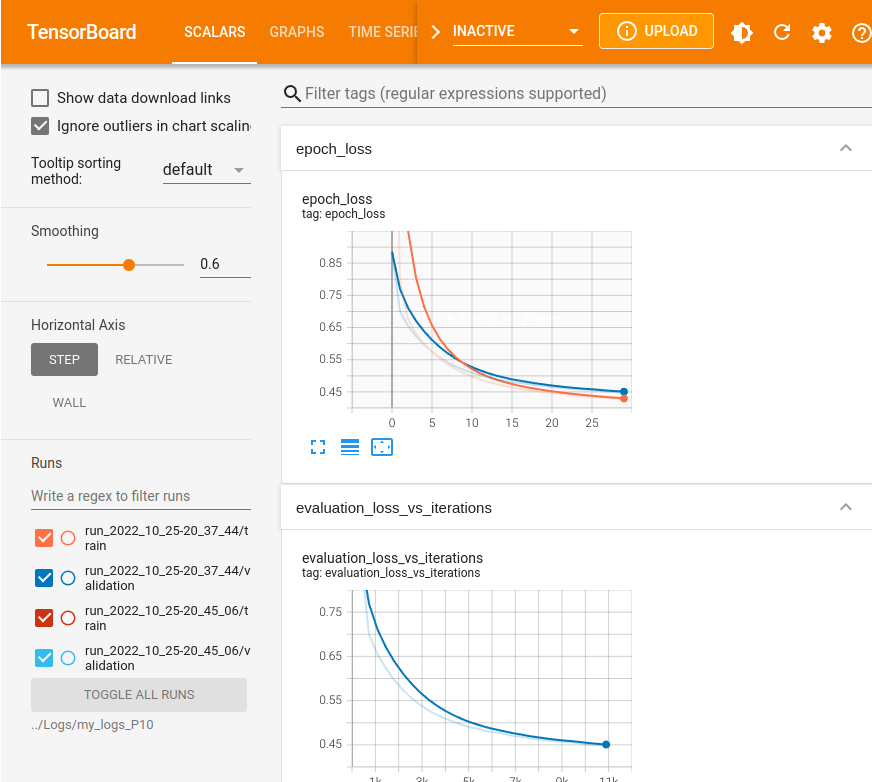

# 微调神经网络超参数 Fine-Tuning Neural Network Hyperparameters

如何知道那种超参数适合你的任务呢？一种选择是简单的尝试超参数的许多组合，然后查看那种对验证集最有效。为此，我们需要将`Keras`模型包装在模仿常规`Scikit-Learn`回归器的对象中。

1. 构建一个函数，在给定一组超参数的情况下构建并编译Keras模型

In [92]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()

    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))

    model.compile(loss="mse",
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

2. 构建Keras模型的包装,使用默认超参数.即可像常规`Scikit-Learn`回归器一样使用

In [93]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_70091/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


3. 训练模型

In [94]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

keras_reg.fit(X_train,
              y_train,
              epochs=100,
              validation_data=(X_val, y_val),
              callbacks=[early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1764 - val_loss: 0.7238
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6456 - val_loss: 0.5994
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5782 - val_loss: 0.5505
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5220 - val_loss: 0.5279
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5148 - val_loss: 0.5061
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4890 - val_loss: 0.4993
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4722 - val_loss: 0.4840
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4621 - val_loss: 0.4798
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4564 - val_loss: 0.4704
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4503 - val_lo

4. 评估 预测

In [95]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
y_pred

1/1 [==============================] - 0s 29ms/step


array([0.636768 , 1.5389655, 3.6958396], dtype=float32)

5. 使用`随机搜索`,尝试探索隐藏层的数量、神经元数量和学习率

In [96]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [97]:
param_distribs = {
    "n_hidden":[0, 1, 2, 3],
    "n_neurons":np.arange(1, 100).tolist(),
    "learning_rate":reciprocal(3e-4, 3e-2).rvs(1000).tolist()
}

In [98]:
rnd_search = RandomizedSearchCV(estimator=keras_reg, 
                                param_distributions=param_distribs,
                                n_iter=10,   # 指定训练次数
                                cv=3, 
                                verbose=2, 
                                random_state=42,
                                n_jobs=-1
                               )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
rnd_search.fit(X_train, y_train, 
               # 将额外的参数传给fit() 并将它们传递给内部的Keras模型
               epochs=100,
               validation_data=(X_val, y_val),   # 仅用于提前停止
               callbacks=[early_stopping_cb]
             )

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.7min remaining:   48.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6096 - val_loss: 0.4839
Epoch 2/100
363/363 [==============================] - 0s 831us/step - loss: 0.4408 - val_loss: 0.4546
Epoch 3/100
363/363 [==============================] - 0s 824us/step - loss: 0.4380 - val_loss: 0.4213
Epoch 4/100
363/363 [==============================] - 0s 823us/step - loss: 0.3984 - val_loss: 0.4280
Epoch 5/100
363/363 [==============================] - 0s 857us/step - loss: 0.4241 - val_loss: 0.4126
Epoch 6/100
363/363 [==============================] - 0s 828us/step - loss: 0.3878 - val_loss: 0.4023
Epoch 7/100
363/363 [==============================] - 0s 830us/step - loss: 0.3728 - val_loss: 0.3883
Epoch 8/100
363/363 [==============================] - 0s 843us/step - loss: 0.3619 - val_loss: 0.3990
Epoch 9/100
363/363 [==============================] - 0s 830us/step - loss: 0.3564 - val_loss: 0.3898
Epoch 10/100
363/363 [==============================] - 0s 803us/step - los

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd77bf60410>,
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.023070247095618657,
                                                          0.0018812193571737948,
                                                          0.0008643988194531686,
                                                          0.0013501716206451731,
                                                          0.015229009691375188,
                                                          0.0029716549588189875,...
                                                          0.0015637438415165158,
                                                          0.003907188555283265,
                                                          0.002004143286241076,
                                           

6. 获取最佳的参数组合

In [99]:
rnd_search.best_params_

{'n_neurons': 41, 'n_hidden': 2, 'learning_rate': 0.015463220453217146}

7. 保存模型并在测试集上进行评估

In [100]:
model = rnd_search.best_estimator_.model

In [101]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 489us/step - loss: 0.2946


# 练习题 Exercise

## ex.2

Q:使用原始人工神经元绘制一个ANN,以计算A⊕B(其中⊕表示XOR操作)。a⊕b = (¬a ∧ b) ∨ (a ∧¬b)

<img src="../images/other/10-11.png" width="400">

## ex.3

Q:为什么通常最好使用`逻辑回归分类器`而不是经典的`感知器`(即使用感知器训练算法训练的单层阈值逻辑单元)?如何调整感知器以使其等同于逻辑回归分类器.

>A classical Perceptron will converge only if the dataset is linearly separable, and it won’t be able to estimate class probabilities. In contrast, **a Logistic Regression classifier will converge to a good solution even if the dataset is not linearly separable, and it will output class probabilities**. If you change the Perceptron’s activation function to the logistic activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

## ex.4

Q: 为什么逻辑激活函数是训练第一个MLP的关键要素?

>The logistic activation function was a key ingredient in training the first MLPs because **its derivative is always nonzero, so Gradient Descent can always roll down the slope**. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.

## ex.5

Q:列举三种常用的激活函数。你能画出来吗?

<img src="../images/other/10-4.png" width="300">
<img src="../images/other/10-5.png" width="300">

## ex.6

Q:假设你有一个MLP,该MLP由一个输入层和10个直通神经元组成,随后是一个包含50个神经元的隐藏层,最后是3个神经元组成的输出层。所有人工神经元都使用ReLU激活函数。
>1. 输入矩阵$X$的形状是什么
2. 隐藏层的权重向量$W_h$及其偏置向量$b_h$的形状是什么?
3. 输出层的权重向量$W_o$及其偏置向量$b_o$的形状是什么?
4. 网络的输出矩阵$Y$的形状是什么?
5. 编写等式计算网络的输出矩阵$Y$(作为$X$、$W_h$、$b_h$、$W_o$和$b_o$的函数)。

>1. The shape of the input matrix $X$ is $m$ × 10, where $m$ represents the **training batch size.**
2. The shape of the hidden layer’s weight vector $W_h$ is 10 × 50, and the length of its bias vector $b_h$ is 50.
3. The shape of the output layer’s weight vector $W_o$ is 50 × 3, and the length of its bias vector $h_o$ is 3.
4. The shape of the network’s output matrix $Y$ is $m$ × 3.
5. $Y* = ReLU[ReLU(X W_h + b_h ) W_o + b_o ]$. Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called broadcasting.

## ex.7

Q:如果要将电子邮件分类为垃圾邮件或正常邮件,你需要在输出层中有多少个神经元?你应该在输出层中使用什么激活函数?相反如果你想解决 MNIST.则在输出层中需要多少个神经元,应该使用哪种激活函数?如第2章所述,如何使你的网络预测房价?

>1. To classify email into spam or ham, you just need **one neuron** in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the **logistic activation function** in the output layer when estimating a probability. 
2. If instead you want to tackle MNIST, you need **10 neurons** in the output layer, and you must replace the logistic function with the **softmax activation function**, which can handle multiple classes, outputting one probability per class. 
3. If you want your neural network to predict housing prices like in Chapter 2, then you need **one output neuron**, using **no activation function** at all in the output layer. 3

## ex.8

Q:什么是反向传播,它如何工作?反向传播和反向模式的`autodiff`有什么区别?

>Backpropagation is a technique used to train artificial neural networks. **It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients.** This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. **To compute the gradients, backpropagation uses reverse-mode autodiff** (although it wasn’t called that when backpropagation was invented, and it has been reinvented several times). **Reverse-mode autodiff performs a forward pass through a computation graph, computing every node’s value for the current training batch, and then it performs a reverse pass, computing all the gradients at once** (see Appendix D for more details). So what’s the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.

## ex.9

Q:你能否列出可以在基本MLP中进行调整的所有超参数?如果MLP过拟合训练数据你如何调整这些超参数来解决问题?

>Here is a list of all the hyperparameters you can tweak in a basic MLP: 
1. **the number of hidden layers**
2. **the number of neurons in each hidden layer**
3. **the activation function used in each hidden layer and in the output layer.**  In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the logistic activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression.
4. If the MLP overfits the training data, you can try **reducing the number of hidden layers** and **reducing the number of neurons per hidden layer**.

## ex.10

Q:完成以下任务:
>在 MNIST数据集上训练一个深度MLP,看是否可以获得98%以上的精度。请尝试使用本章介绍的方法来寻找最佳学习率(即通过成倍地提高学习率,画出误差,并找出误差发生的点)。尝试一下其他的功能一一保存检査点,使用早期停止,并使用
`TensorBoard`绘制学习曲线。

1. Load the dataset

In [99]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

2. Split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST

In [100]:
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

X_test  = X_test / 255.0

3. Plot an image 

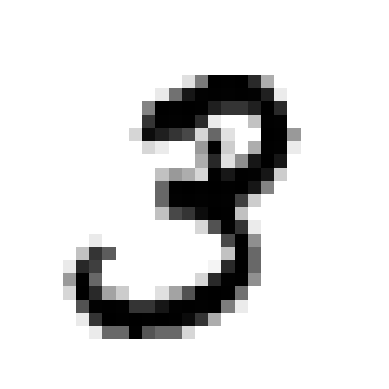

In [101]:
plt.imshow(X_train[1], cmap="binary")
plt.axis("off")
plt.show()

4. Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [102]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy']
             )

5. We will start with a small learning rate of `1e-3`, and grow it by 0.5% at each iteration.

In [104]:
class expLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch ,logs):
        lr_var = self.model.optimizer.learning_rate
        self.rates.append(keras.backend.get_value(lr_var))
        self.losses.append(logs["loss"])
        
        keras.backend.set_value(x=lr_var, value=lr_var*self.factor)

exp_lr = expLearningRate(factor=1.005)   # 0.5%

6. Train the model for just 1 epoch

In [105]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_val, y_val),
                    callbacks=[exp_lr]
                   )

1719/1719 [==============================] - 3s 2ms/step - loss: 4135042304.0000 - accuracy: 0.5659 - val_loss: 2.3911 - val_accuracy: 0.1126


7. Plot the loss as a function of the learning rate

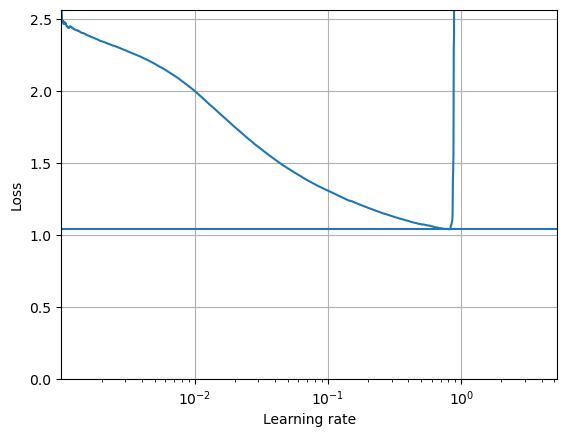

In [106]:
plt.plot(exp_lr.rates, exp_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(y=min(exp_lr.losses), xmin=min(exp_lr.rates), xmax=max(exp_lr.rates))
plt.axis([min(exp_lr.rates), max(exp_lr.rates), 0, exp_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

8. The loss starts shooting back up violently when the learning rate goes over `6e-1`, so let's try using half of that, at `3e-1`

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=['accuracy']
             )

In [108]:
run_index = 1
run_dir = os.path.join('../Logs/', "my_mnist_logs", "run_{:03d}".format(run_index))
run_dir

'../Logs/my_mnist_logs/run_001'

In [109]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("../models/my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_dir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2345 - accuracy: 0.9270 - val_loss: 0.1097 - val_accuracy: 0.9670
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0944 - accuracy: 0.9702 - val_loss: 0.0890 - val_accuracy: 0.9750
Epoch 3/100
1719/1719 [==============================] - 2s 994us/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0745 - val_accuracy: 0.9784
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0913 - val_accuracy: 0.9752
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0883 - val_accuracy: 0.9760
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0683 - val_accuracy: 0.9806
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0788 - val_

In [110]:
%load_ext tensorboard
%tensorboard --logdir=../Logs/my_mnist_logs --port=6061

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


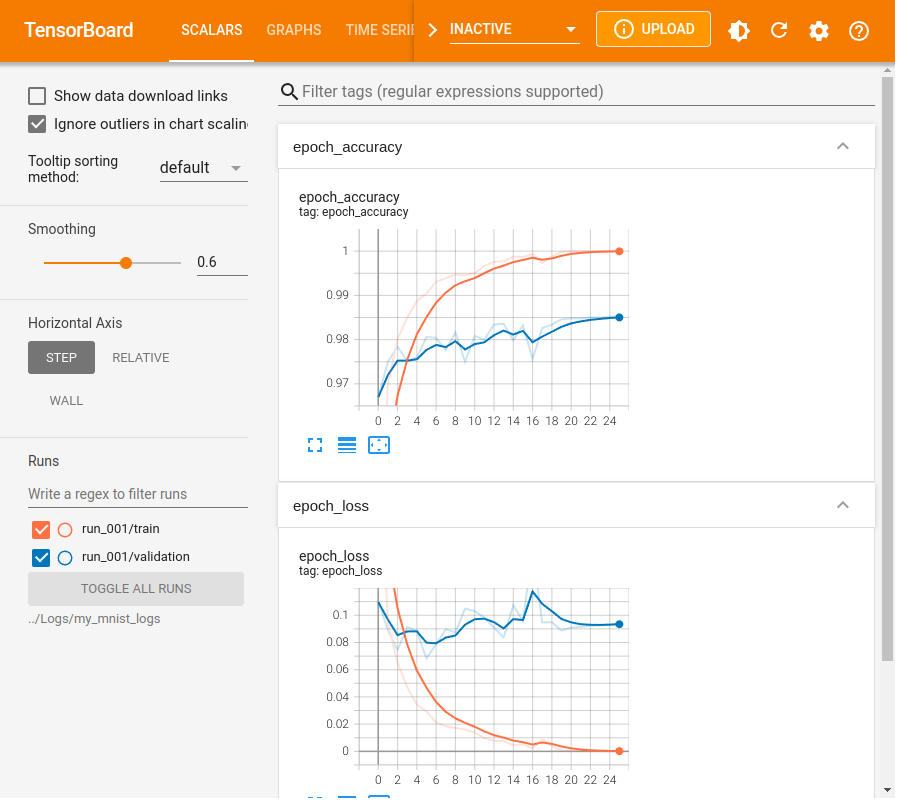

> create:Apotosome 09/23/21

> update:Apotosome 10/25/22